# 01. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Data & address PII data

In [2]:
path = r'C:\Users\Vicky\Desktop\04-2024 Instacart Basket Analysis'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_final.csv'))

In [4]:
df.head ()

,user_id,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spending_flag,median_order_period,frequent_flag,frequent_ flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,NaN
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,NaN
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,NaN
3,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,NaN
4,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,...,Regularly busy,Busiest days,Average orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,NaN


In [5]:
df.shape

(32404859, 33)

In [6]:
df.dtypes

user_id                     int64
first_name                 object
surname                    object
gender                     object
state                      object
age                         int64
date_joined                object
n_dependants                int64
marital_status             object
income                      int64
Unnamed: 0                  int64
order_id                    int64
order_number                int64
orders_day_of_week          int64
orders_time_of_day          int64
days_since_prior_order    float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                    int64
department_id               int64
prices                    float64
busiest_day                object
busiest_days               object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
average_spend             float64
spending_flag 

'first_name' & 'surname' columns need to be removed for data security purpose
'Unnamed", 'frequent_ flag' and 'busiest_days ' can also be dropped

In [8]:
# Drop columns are not needed
df.drop(columns = ['first_name', 'surname', 'Unnamed: 0', 'frequent_ flag', 'busiest_days'])

,user_id,gender,state,age,date_joined,n_dependants,marital_status,income,order_id,order_number,...,department_id,prices,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spending_flag,median_order_period,frequent_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,7,9.0,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,7,9.0,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,7,9.0,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,7,9.0,Regularly busy,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,...,7,9.0,Regularly busy,Average orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,186788,Female,New Mexico,26,3/31/2020,2,married,69631,242984,13,...,19,2.6,Regularly busy,Most orders,24,Regular customer,8.288235,Low spender,12.0,Regular customer
32404855,159099,Male,Ohio,73,3/31/2020,2,married,110699,1282954,7,...,8,11.2,Regularly busy,Most orders,9,New customer,7.663559,Low spender,30.0,Non-frequent customer
32404856,159099,Male,Ohio,73,3/31/2020,2,married,110699,1588645,8,...,8,11.2,Regularly busy,Most orders,9,New customer,7.663559,Low spender,30.0,Non-frequent customer
32404857,122741,Male,Michigan,24,4/1/2020,2,married,73357,1373599,5,...,11,5.4,Regularly busy,Most orders,10,New customer,8.974576,Low spender,30.0,Non-frequent customer


# 03. Create a regional segmentation

In [9]:
df.loc[df['state'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania',
'New Jersey']),'region'] = 'Northeast'
df.loc[df['state'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska',
'Kansas','Minnesota','Iowa','Missouri']),'region'] = 'Midwest'
df.loc[df['state'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia',
'Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']),'region'] = 'South'
df.loc[df['state'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico',
'Alaska','Washington','Oregon','California','Hawaii']),'region'] = 'Mountain'

In [10]:
# Check that the frequencies of label variables 
df['region'].value_counts(dropna= False)

region
South        10791885
Mountain      8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [11]:
# determine if there's a difference in spending habits between regions 
crosstab = pd.crosstab(df['spending_flag'], df['region'], dropna = False)

In [12]:
crosstab.to_clipboard()

In [13]:
df.groupby('region').agg({'average_spend': ['median', 'mean', 'min', 'max']})

average_spend                              
                 median       mean  min           max
region                                               
Midwest        7.827941  12.715483  1.0  25005.425000
Mountain       7.821429  11.319834  1.0  10209.987755
Northeast      7.814725  11.554997  1.1   7414.485185
South          7.830769  12.195577  1.0  15006.940000

In [23]:
df.groupby('region')['average_spend'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Midwest,7597325.0,12.715483,101.090885,1.0,7.390435,7.827941,8.253731,25005.425000
Mountain,8292913.0,11.319834,66.927866,1.0,7.389324,7.821429,8.252392,10209.987755
Northeast,5722736.0,11.554997,67.913302,1.1,7.384178,7.814725,8.238650,7414.485185
South,10791885.0,12.195577,87.883830,1.0,7.385246,7.830769,8.265185,15006.940000


In [24]:
df.groupby('region')['spending_flag'].describe()

,count,unique,top,freq
region,,,,
Midwest,7597325,2,Low spender,7441350
Mountain,8292913,2,Low spender,8132559
Northeast,5722736,2,Low spender,5614511
South,10791885,2,Low spender,10582194


The majority of customer from all 4 regions are low spenders, but the average spend of Midwest customers is higher.

# 04. Create an exclusion flag for low-activity customers

In [29]:
df.loc[df['max_order']>=5, 'exclusion_flag'] = 'Not Excluded'
df.loc[df['max_order']<5, 'exclusion_flag'] = 'Excluded'

In [30]:
df['exclusion_flag'].value_counts()

exclusion_flag
Not Excluded    30964564
Excluded         1440295
Name: count, dtype: int64

In [31]:
# Create dataframe with only note excluded data
df2 = df[df['exclusion_flag']=='Not Excluded']

In [21]:
# Export Not Exclued dataset
df2.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Orders_Product_all_not_excluded.csv'))

# 05. Customer profiling

In [3]:
# Due to memory error. Reimport the not exclused dataframe
df2 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Orders_Product_all_not_excluded.csv'))

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 36 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0.1            int64  
 1   user_id                 int64  
 2   first_name              object 
 3   surname                 object 
 4   gender                  object 
 5   state                   object 
 6   age                     int64  
 7   date_joined             object 
 8   n_dependants            int64  
 9   marital_status          object 
 10  income                  int64  
 11  Unnamed: 0              int64  
 12  order_id                int64  
 13  order_number            int64  
 14  orders_day_of_week      int64  
 15  orders_time_of_day      int64  
 16  days_since_prior_order  float64
 17  product_id              int64  
 18  add_to_cart_order       int64  
 19  reordered               int64  
 20  product_name            object 
 21  aisle_id                int64

In [4]:
# Drop columns are not needed
df2 = df2.drop(columns = ['Unnamed: 0.1','first_name', 'surname', 'Unnamed: 0', 'frequent_ flag', 'busiest_days', 'state', 'date_joined', 'exclusion_flag'])

In [5]:
# Creating Generation categories
df2.loc[df2['age'] < 20,'generation'] = 'Gen Z'
df2.loc[(df2['age'] >= 20) & (df2['age']< 36),'generation'] = 'Millennials'
df2.loc[(df2['age'] >= 36) & (df2['age']< 52),'generation'] = 'Gen X'
df2.loc[df2['age'] >= 52,'generation'] = 'Baby Boomers'

In [6]:
df2['generation'].value_counts(dropna= False)

generation
Baby Boomers    14455281
Gen X            7770478
Millennials      7764271
Gen Z             974534
Name: count, dtype: int64

In [6]:
df2.groupby('generation').agg({'income': ['median', 'mean', 'min', 'max']})

income                              
                median           mean    min     max
generation                                          
Baby Boomers  116124.0  115806.883506  29001  593901
Gen X          99597.0  102324.794906  25903  592409
Gen Z          69017.0   70263.259946  25972  396364
Millennials    69142.0   70684.312555  25911  392552

In [7]:
# Creating dependants categories
df2.loc[df2['n_dependants'] == 0,'dependants'] = 'No Dependants'
df2.loc[df2['n_dependants'] > 0,'dependants'] = 'Has Dependants'

In [8]:
df2['dependants'].value_counts(dropna= False)

dependants
Has Dependants    23224883
No Dependants      7739681
Name: count, dtype: int64

In [10]:
crosstab = pd.crosstab(df2['dependants'], df2['generation'], dropna = False)

In [11]:
crosstab.to_clipboard()

In [8]:
# Create demographic-based customer profile
df2.loc[(df2['generation'] == 'Baby Boomers') & (df2['dependants'] == 'No Dependants'),'demographic_profile'] = 'Baby Boomers without Dependants'
df2.loc[(df2['generation'] == 'Baby Boomers') & (df2['dependants'] == 'Has Dependants'),'demographic_profile'] = 'Baby Boomers with Dependants'
df2.loc[(df2['generation'] == 'Gen X') & (df2['dependants'] == 'No Dependants'),'demographic_profile'] = 'Gen X without Dependants'
df2.loc[(df2['generation'] == 'Gen X') & (df2['dependants'] == 'Has Dependants'),'demographic_profile'] = 'Gen X with Dependants'
df2.loc[(df2['generation'] == 'Millennials') & (df2['dependants'] == 'No Dependants'),'demographic_profile'] = 'Millennials without Dependants'
df2.loc[(df2['generation'] == 'Millennials') & (df2['dependants'] == 'Has Dependants'),'demographic_profile'] = 'Millennials with Dependants'
df2.loc[(df2['generation'] == 'Gen Z') & (df2['dependants'] == 'No Dependants'),'demographic_profile'] = 'Gen Z without Dependants'
df2.loc[(df2['generation'] == 'Gen Z') & (df2['dependants'] == 'Has Dependants'),'demographic_profile'] = 'Gen Z with Dependants'

In [9]:
df2['demographic_profile'].value_counts(dropna= False)

demographic_profile
Baby Boomers with Dependants       10815753
Gen X with Dependants               5848015
Millennials with Dependants         5811417
Baby Boomers without Dependants     3639528
Millennials without Dependants      1952854
Gen X without Dependants            1922463
Gen Z with Dependants                749698
Gen Z without Dependants             224836
Name: count, dtype: int64

In [25]:
# create pivot table to list out each demographic_profile's most frequently department_id purchase
df2.pivot_table(index = "department_id", columns = "demographic_profile", aggfunc = {"department_id": len})

department_id  \
demographic_profile Baby Boomers with Dependants   
department_id                                      
1                                         743292   
2                                          11981   
3                                         391902   
4                                        3169376   
5                                          48920   
6                                          88596   
7                                         906637   
8                                          32623   
9                                         288564   
10                                         11857   
11                                        148210   
12                                        238241   
13                                        624256   
14                                        233422   
15                                        355198   
16                                       1795256   
17                                        247677   
18                                        139951   
19                                        967751   
20                                        349307   
21                                         22736   

                                                                           \
demographic_profile Baby Boomers without Dependants Gen X with Dependants   
department_id                                                               
1                                            251934                398438   
2                                              3988                  6311   
3                                            131141                210450   
4                                           1067753               1717420   
5                                             17154                 26738   
6                                             29754                 48623   
7                                            303442                483768   
8                                             10912                 17190   
9                                             96167                154778   
10                                             3714                  6299   
11                                            49824                 81344   
12                                            78447                127437   
13                                           209193                337053   
14                                            78178                126545   
15                                           117050                190092   
16                                           611307                980437   
17                                            80721                134091   
18                                            47601                 82936   
19                                           324829                517384   
20                                           119450                188523   
21                                             6969                 12158   

                                                                    \
demographic_profile Gen X without Dependants Gen Z with Dependants   
department_id                                                        
1                                     131030                 51709   
2                                       2185                   847   
3                                      70304                 26607   
4                                     569330                219787   
5                                       9430                  4736   
6                                      16105                  6316   
7                                     160664                 59500   
8                                       5907                  2360   
9                                      50046                 20468   
10                                      1957                   775   
11                         

In [26]:
# create pivot table to list out each demographic_profile's most frequently time of day purchase
df2.pivot_table(index = "orders_time_of_day", columns = "demographic_profile", aggfunc = {"orders_time_of_day": len})

orders_time_of_day  \
demographic_profile Baby Boomers with Dependants   
orders_time_of_day                                 
0                                          71573   
1                                          38173   
2                                          21662   
3                                          16613   
4                                          18815   
5                                          29951   
6                                          98276   
7                                         304613   
8                                         578936   
9                                         826429   
10                                        925680   
11                                        910848   
12                                        873182   
13                                        887428   
14                                        899943   
15                                        882572   
16                                        842761   
17                                        695100   
18                                        545619   
19                                        417191   
20                                        322344   
21                                        266807   
22                                        208225   
23                                        133012   

                                                                           \
demographic_profile Baby Boomers without Dependants Gen X with Dependants   
orders_time_of_day                                                          
0                                             22930                 39473   
1                                             12022                 21453   
2                                              8293                 12729   
3                                              6272                  9074   
4                                              5598                  8597   
5                                             10355                 15253   
6                                             32518                 51297   
7                                            106235                157126   
8                                            196021                313828   
9                                            276610                446205   
10                                           308818                500918   
11                                           304488                494563   
12                                           291188                473468   
13                                           297190                480462   
14                                           300050                482979   
15                                           297610                478159   
16                                           286977                449974   
17                                           233658                375980   
18                                           179692                298386   
19                                           141301                226521   
20                                           111573                176051   
21                                            90563                145810   
22                                            72929                115830   
23                                            46637                 73879   

                                                                    \
demographic_profile Gen X without Dependants Gen Z with Dependants   
orders_time_of_day                                                   
0                                      13979                  5768   
1                                       6829                  2915   
2                                       3742                  1753   
3                                       2624                  1394   
4                                       2936           

In [27]:
# create pivot table to list out each demographic_profile's most frequently day of week purchase
df2.pivot_table(index = "orders_day_of_week", columns = "demographic_profile", aggfunc = {"orders_day_of_week": len})

orders_day_of_week  \
demographic_profile Baby Boomers with Dependants   
orders_day_of_week                                 
0                                        2054738   
1                                        1885368   
2                                        1410500   
3                                        1286730   
4                                        1265238   
5                                        1405135   
6                                        1508044   

                                                                           \
demographic_profile Baby Boomers without Dependants Gen X with Dependants   
orders_day_of_week                                                          
0                                            697569               1117674   
1                                            632214               1013801   
2                                            472935                763971   
3                                            432934                691570   
4                                            420804                685817   
5                                            478366                756702   
6                                            504706                818480   

                                                                    \
demographic_profile Gen X without Dependants Gen Z with Dependants   
orders_day_of_week                                                   
0                                     368145                141990   
1                                     333603                133551   
2                                     250276                 96487   
3                                     227719                 87718   
4                                     225922                 87563   
5                                     256205                 99145   
6                                     260593                103244   

                                                                          \
demographic_profile Gen Z without Dependants Millennials with Dependants   
orders_day_of_week                                                         
0                                      40773                     1117130   
1                                      40949                     1016616   
2                                      28870                      751167   
3                                      27697                      686475   
4                                      26289                      681117   
5                                      29335                      758573   
6                                      30923                      800339   

                                                    
demographic_profile Millennials without Dependants  
orders_day_of_week                                  
0                                           370591  
1                                           355584  
2                                           250500  
3                                           228692  
4                                           232244  
5                                           250268  
6                                           264975

In [9]:
# Creating income categories
df2.loc[df2['income'] < 58000,'income_type'] = 'Low'
df2.loc[(df2['income'] >= 58000) & (df2['income']< 94000),'income_type'] = 'Middle'
df2.loc[df2['income'] >= 94000,'income_type'] = 'High'

In [9]:
df2['income_type'].value_counts(dropna= False)

income_type
High      16568313
Middle     9116675
Low        5279576
Name: count, dtype: int64

In [13]:
df2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_final0426.pkl'))

# 06. Customer profiling visualization

In [13]:
# Create Subsetting for visualization creation
df_Baby_Boomers_Dependants = df2[df2['demographic_profile']== 'Baby Boomers with Dependants']

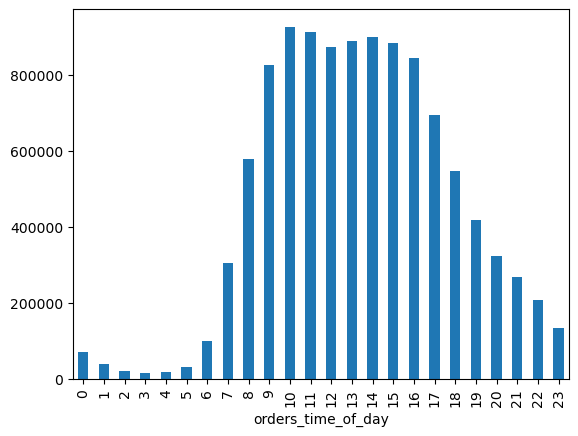

In [15]:
bar_Baby_Boomers_Dependants_purchase_time = df_Baby_Boomers_Dependants['orders_time_of_day'].value_counts().sort_index().plot.bar()

In [17]:
bar_Baby_Boomers_Dependants_purchase_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Baby_Boomers_Dependants_purchase_time.png'))

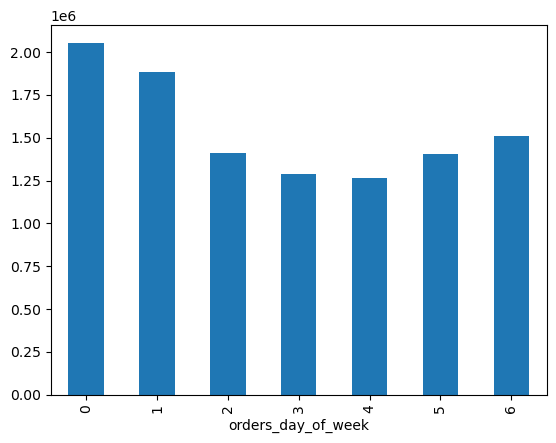

In [18]:
bar_Baby_Boomers_Dependants_purchase_day = df_Baby_Boomers_Dependants['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [19]:
bar_Baby_Boomers_Dependants_purchase_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Baby_Boomers_Dependant_purchase_day.png'))

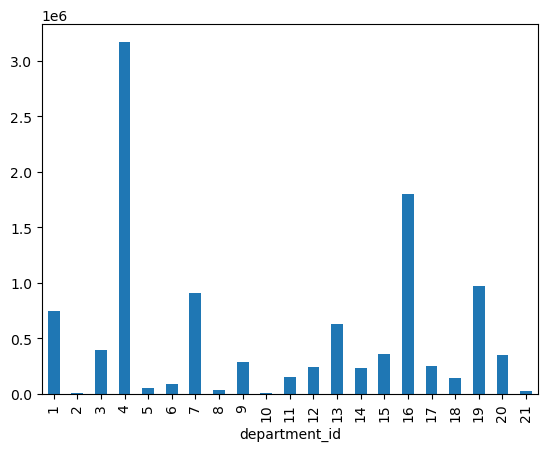

In [20]:
bar_Baby_Boomers_Dependants_purchase_item = df_Baby_Boomers_Dependants['department_id'].value_counts().sort_index().plot.bar()

In [21]:
bar_Baby_Boomers_Dependants_purchase_item.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Baby_Boomers_Dependant_purchase_item.png'))

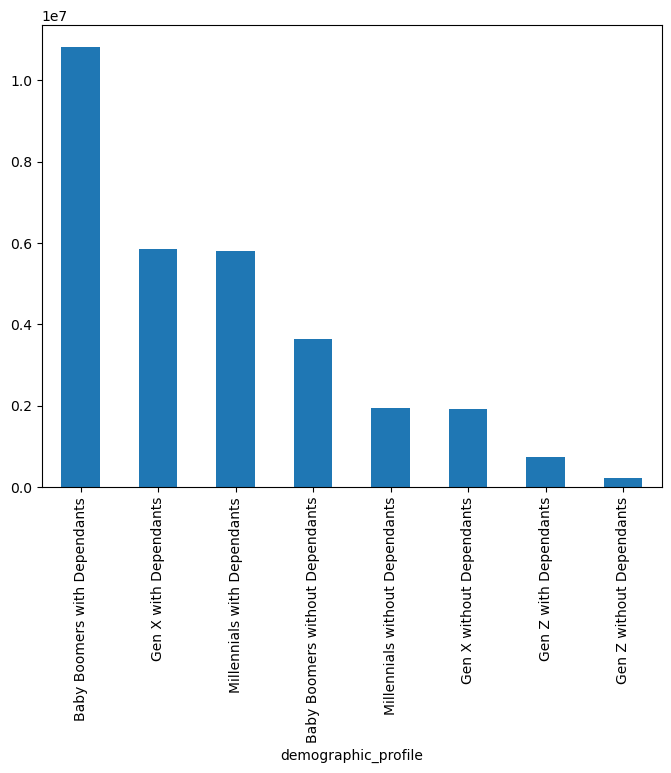

In [28]:
plt.figure(figsize= (8, 6))
Purchase_frequently = df2.groupby('demographic_profile')['order_id'].count().sort_values(ascending = False)
Purchase_frequently.plot(label="", kind='bar')
plt.show()

In [22]:
df_Baby_Boomers_No_Dependants = df2[df2['demographic_profile']== 'Baby Boomers without Dependants']

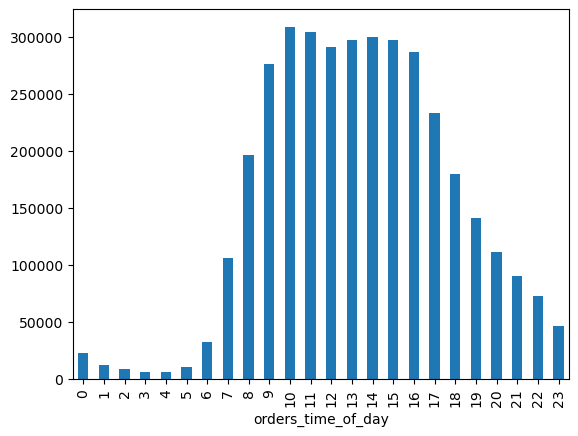

In [23]:
bar_Baby_Boomers_No_Dependants_purchase_time = df_Baby_Boomers_No_Dependants['orders_time_of_day'].value_counts().sort_index().plot.bar()

In [24]:
bar_Baby_Boomers_No_Dependants_purchase_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Baby_Boomers_No_Dependants_purchase_time.png'))

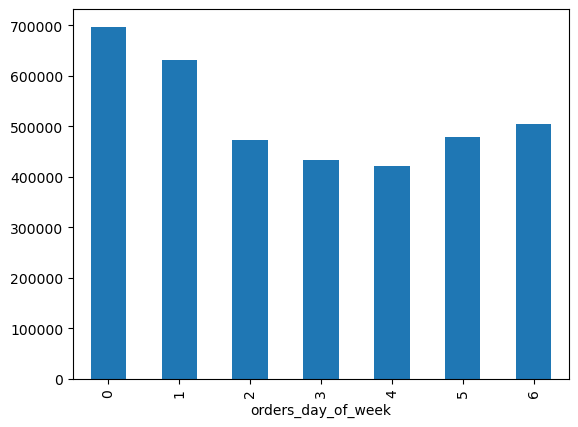

In [25]:
bar_Baby_Boomers_No_Dependants_purchase_day = df_Baby_Boomers_No_Dependants['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [26]:
bar_Baby_Boomers_No_Dependants_purchase_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Baby_Boomers_No_Dependants_purchase_day.png'))

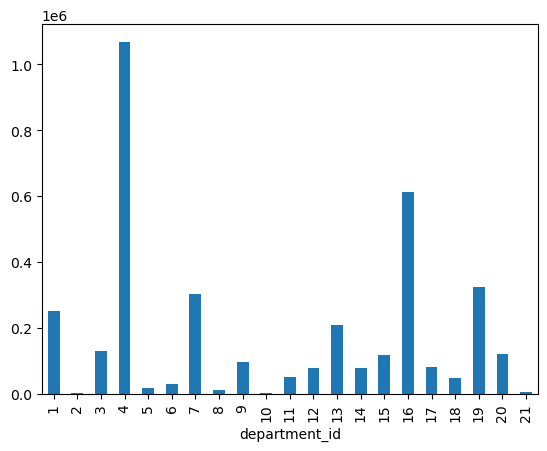

In [27]:
bar_Baby_Boomers_No_Dependants_purchase_item  = df_Baby_Boomers_No_Dependants['department_id'].value_counts().sort_index().plot.bar()

In [79]:
bar_Baby_Boomers_No_Dependants_purchase_item.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Baby_Boomers_No_Dependants_purchase_item.png'))

In [28]:
df_Gen_X_Dependants = df2[df2['demographic_profile']== 'Gen X with Dependants']

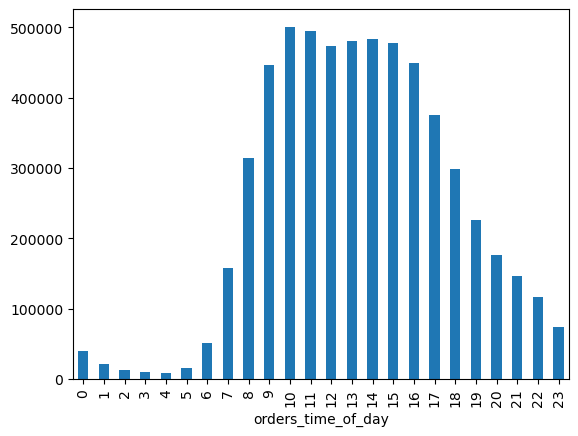

In [29]:
bar_Gen_X_Dependants_purchase_time = df_Gen_X_Dependants['orders_time_of_day'].value_counts().sort_index().plot.bar()

In [30]:
bar_Gen_X_Dependants_purchase_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Gen_X_Dependants_purchase_time.png'))

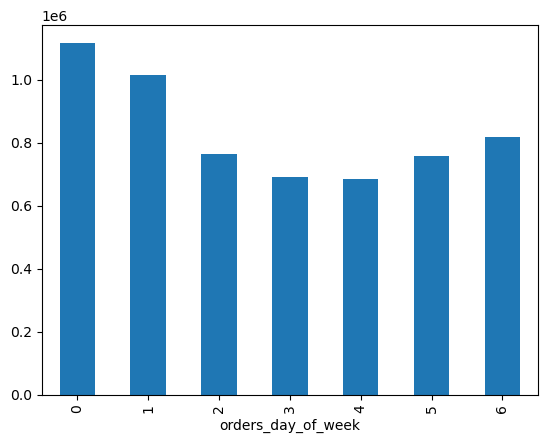

In [31]:
bar_Gen_X_Dependants_purchase_day = df_Gen_X_Dependants['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [32]:
bar_Gen_X_Dependants_purchase_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Gen_X_Dependants_purchase_day.png'))

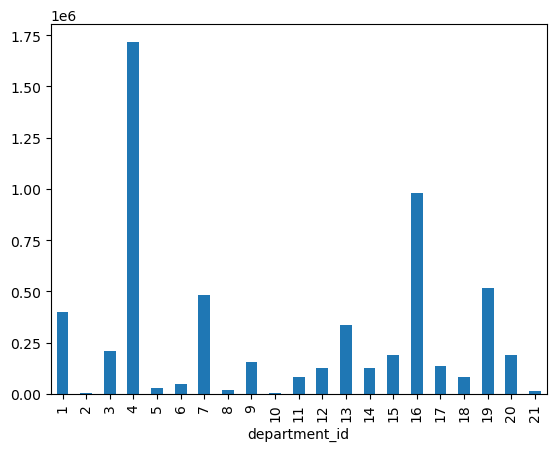

In [33]:
bar_Gen_X_Dependants_purchase_item = df_Gen_X_Dependants['department_id'].value_counts().sort_index().plot.bar()

In [34]:
bar_Gen_X_Dependants_purchase_item.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Gen_X_Dependants_purchase_item.png'))

In [38]:
df_Gen_X_No_Dependants = df2[df2['demographic_profile']== 'Gen X without Dependants']

In [39]:
df_Gen_X_No_Dependants.shape

(1922463, 31)

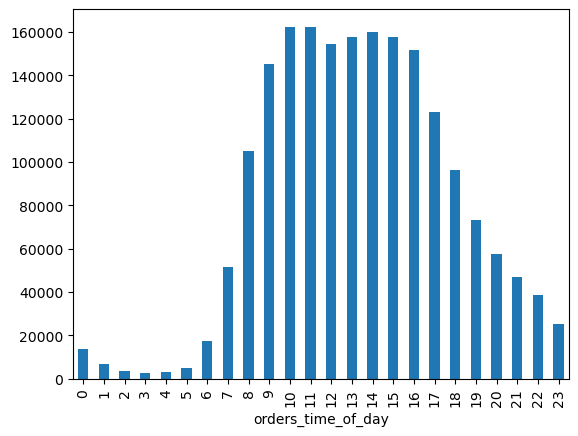

In [40]:
bar_Gen_X_No_Dependants_purchase_time = df_Gen_X_No_Dependants['orders_time_of_day'].value_counts().sort_index().plot.bar()

In [41]:
bar_Gen_X_No_Dependants_purchase_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Gen_X_No_Dependants_purchase_time.png'))

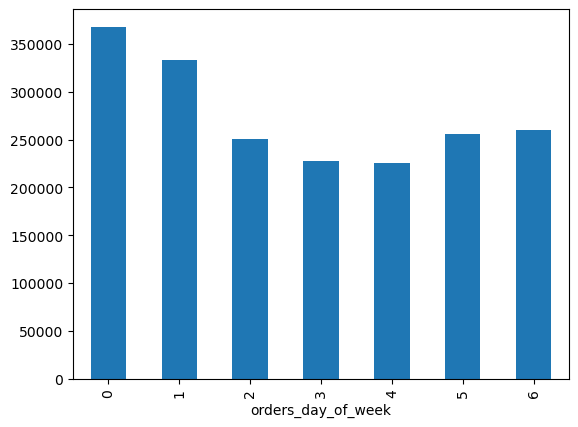

In [42]:
bar_Gen_X_No_Dependants_purchase_day = df_Gen_X_No_Dependants['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [43]:
bar_Gen_X_No_Dependants_purchase_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Gen_X_No_Dependants_purchase_day.png'))

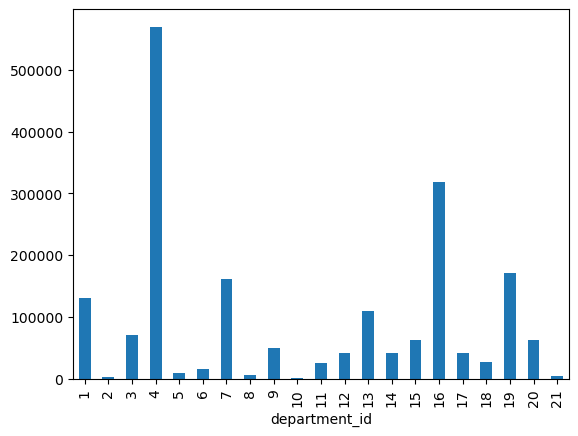

In [44]:
bar_Gen_X_No_Dependants_purchase_item = df_Gen_X_No_Dependants['department_id'].value_counts().sort_index().plot.bar()

In [45]:
bar_Gen_X_No_Dependants_purchase_item.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Gen_X_No_Dependants_purchase_item.png'))

In [46]:
df_Millennials_Dependants = df2[df2['demographic_profile']== 'Millennials with Dependants']

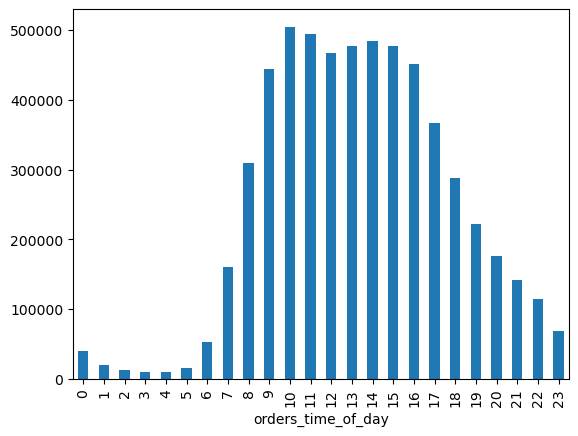

In [47]:
bar_Millennials_Dependants_purchase_time = df_Millennials_Dependants['orders_time_of_day'].value_counts().sort_index().plot.bar()

In [48]:
bar_Millennials_Dependants_purchase_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Millennials_Dependants_purchase_time.png'))

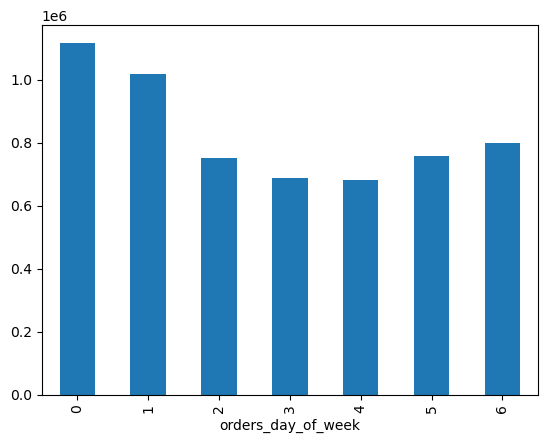

In [49]:
bar_Millennials_Dependants_purchase_day = df_Millennials_Dependants['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [50]:
bar_Millennials_Dependants_purchase_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Millennials_Dependants_purchase_day.png'))

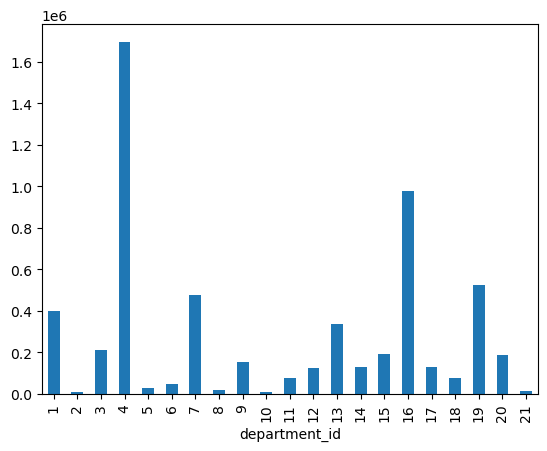

In [51]:
bar_Millennials_Dependants_purchase_item = df_Millennials_Dependants['department_id'].value_counts().sort_index().plot.bar()

In [60]:
bar_Millennials_Dependants_purchase_item.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Millennials_Dependants_purchase_item.png'))

In [53]:
df_Millennials_No_Dependants = df2[df2['demographic_profile']== 'Millennials without Dependants']

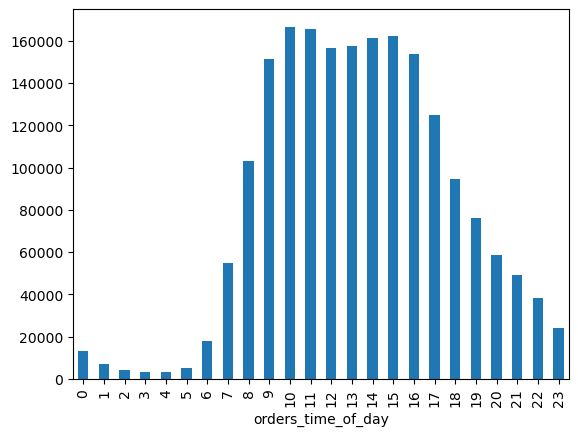

In [56]:
bar_Millennials_NO_Dependants_purchase_time = df_Millennials_No_Dependants['orders_time_of_day'].value_counts().sort_index().plot.bar()

In [59]:
bar_Millennials_NO_Dependants_purchase_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Millennials_No_Dependants_purchase_time.png'))

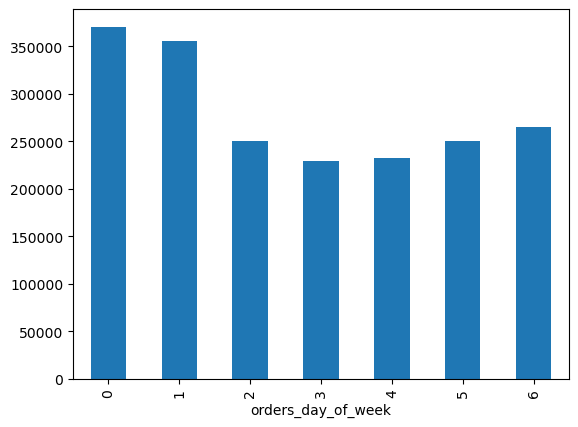

In [61]:
bar_Millennials_No_Dependants_purchase_day = df_Millennials_No_Dependants['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [62]:
bar_Millennials_No_Dependants_purchase_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Millennials_No_Dependants_purchase_day.png'))

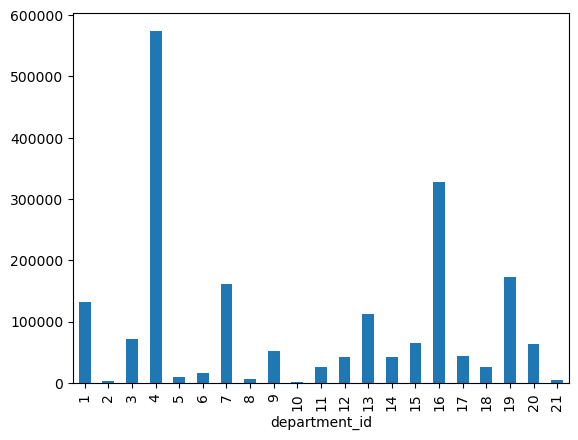

In [63]:
bar_Millennials_No_Dependants_purchase_item = df_Millennials_No_Dependants['department_id'].value_counts().sort_index().plot.bar()

In [64]:
bar_Millennials_No_Dependants_purchase_item.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Millennials_No_Dependants_purchase_item.png'))

In [65]:
df_Gen_Z_with_Dependants = df2[df2['demographic_profile']== 'Gen Z with Dependants']

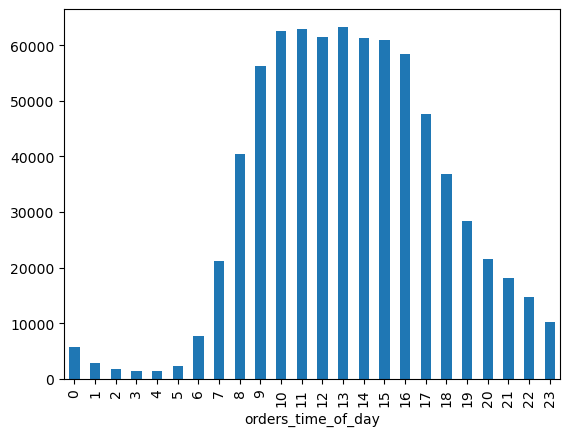

In [66]:
bar_Gen_Z_with_Dependants_purchase_time = df_Gen_Z_with_Dependants['orders_time_of_day'].value_counts().sort_index().plot.bar()

In [80]:
bar_Gen_Z_with_Dependants_purchase_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Gen_Z_Dependants_purchase_time.png'))

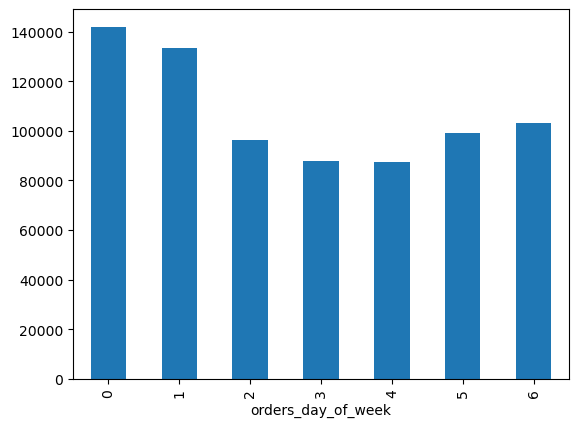

In [68]:
bar_Gen_Z_with_Dependants_purchase_day = df_Gen_Z_with_Dependants['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [81]:
bar_Gen_Z_with_Dependants_purchase_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Gen_Z_Dependants_purchase_day.png'))

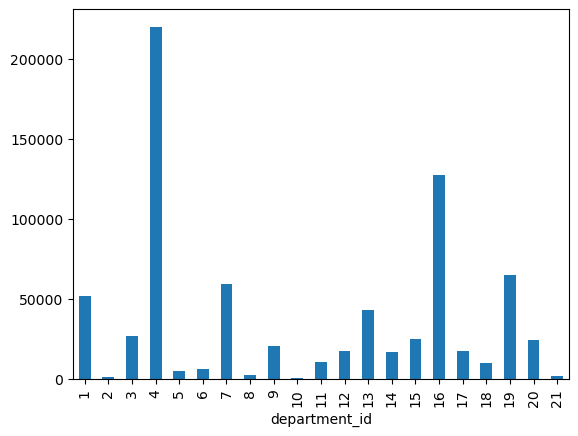

In [70]:
bar_Gen_Z_with_Dependants_purchase_item = df_Gen_Z_with_Dependants['department_id'].value_counts().sort_index().plot.bar()

In [82]:
bar_Gen_Z_with_Dependants_purchase_item.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Gen_Z_Dependants_purchase_item.png'))

In [72]:
df_Gen_Z_No_Dependants = df2[df2['demographic_profile']== 'Gen Z without Dependants']

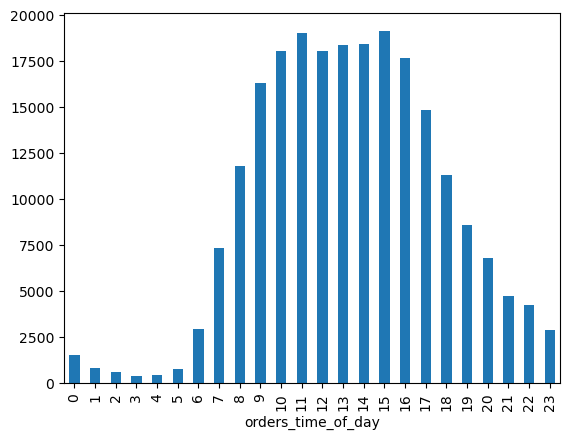

In [73]:
bar_Gen_Z_No_Dependants_purchase_time = df_Gen_Z_No_Dependants['orders_time_of_day'].value_counts().sort_index().plot.bar()

In [86]:
bar_Gen_Z_No_Dependants_purchase_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Gen_Z_No_Dependants_purchase_time.png'))

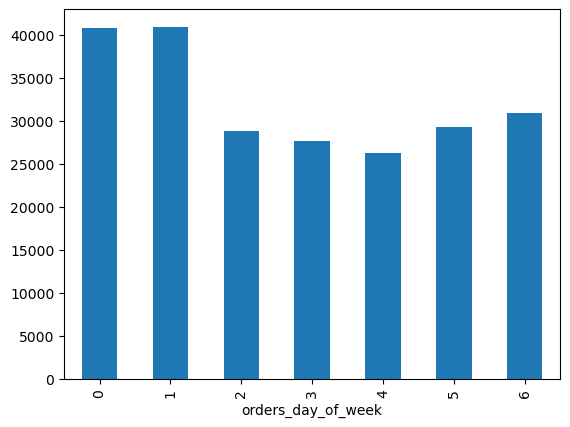

In [75]:
bar_Gen_Z_No_Dependants_purchase_day = df_Gen_Z_No_Dependants['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [84]:
bar_Gen_Z_No_Dependants_purchase_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Gen_Z_No_Dependants_purchase_day.png'))

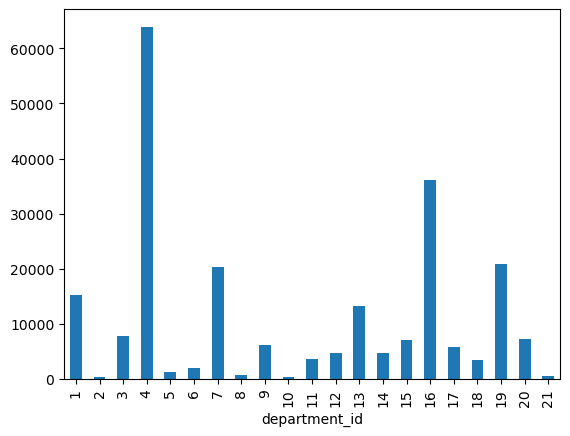

In [77]:
bar_Gen_Z_No_Dependants_purchase_item = df_Gen_Z_No_Dependants['department_id'].value_counts().sort_index().plot.bar()

In [85]:
bar_Gen_Z_No_Dependants_purchase_item.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Gen_Z_No_Dependants_purchase_item.png'))

In [17]:
df_Midwest = df2[df2['region']== 'Midwest']

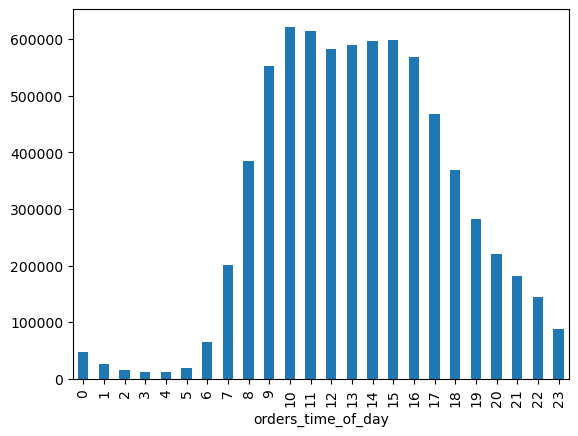

In [18]:
bar_Midwest_purchase_time = df_Midwest['orders_time_of_day'].value_counts().sort_index().plot.bar()

In [20]:
bar_Midwest_purchase_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Midwest_purchase_time.png'))

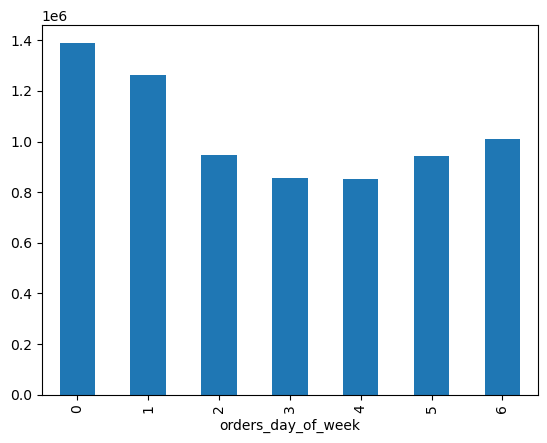

In [21]:
bar_Midwest_purchase_day = df_Midwest['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [22]:
bar_Midwest_purchase_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Midwest_purchase_day.png'))

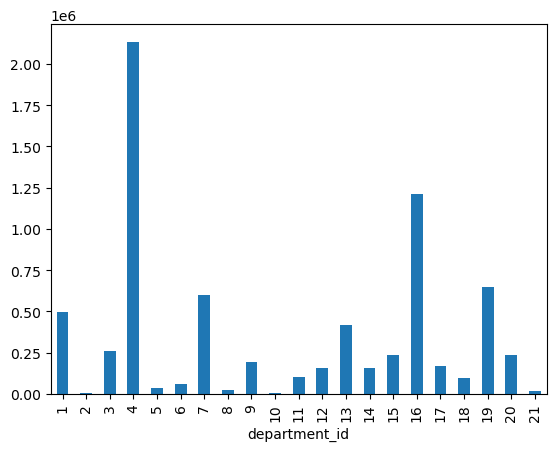

In [23]:
bar_Midwest_purchase_item = df_Midwest['department_id'].value_counts().sort_index().plot.bar()

In [24]:
bar_Midwest_purchase_item.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Midwest_purchase_item.png'))

In [25]:
df_Mountain = df2[df2['region']== 'Mountain']

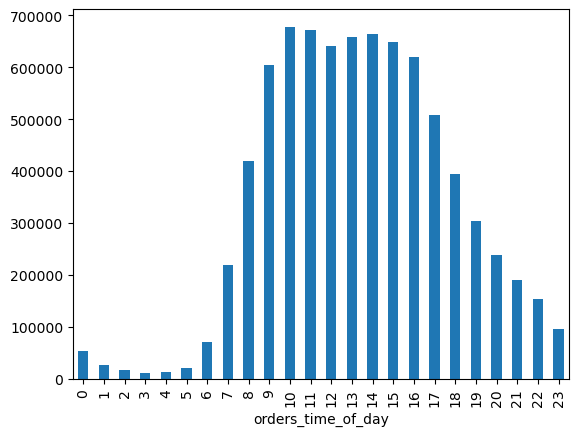

In [26]:
bar_Mountain_purchase_time = df_Mountain['orders_time_of_day'].value_counts().sort_index().plot.bar()

In [27]:
bar_Mountain_purchase_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Mountain_purchase_time.png'))

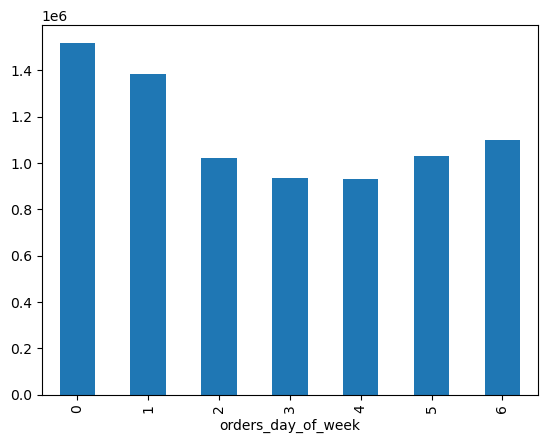

In [28]:
bar_Mountain_purchase_day = df_Mountain['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [29]:
bar_Mountain_purchase_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Mountain_purchase_day.png'))

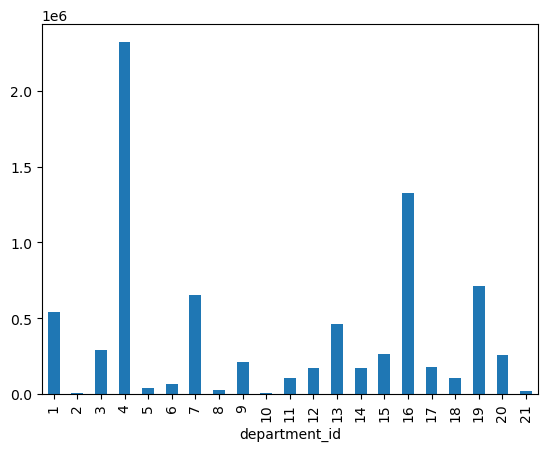

In [30]:
bar_Mountain_purchase_item = df_Mountain['department_id'].value_counts().sort_index().plot.bar()

In [31]:
bar_Mountain_purchase_item.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Mountain_purchase_item.png'))

In [32]:
df_Northeast = df2[df2['region']== 'Northeast']

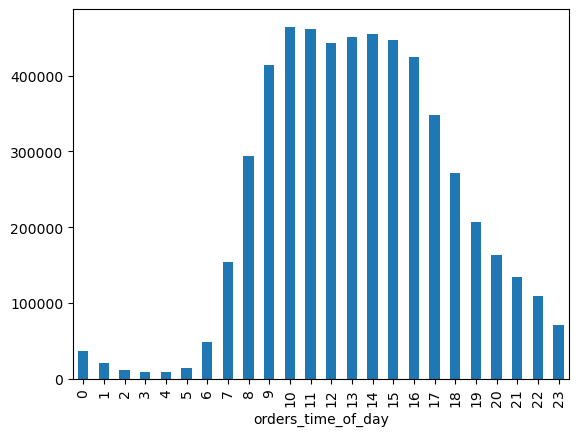

In [33]:
bar_Northeast_purchase_time = df_Northeast['orders_time_of_day'].value_counts().sort_index().plot.bar()

In [34]:
bar_Northeast_purchase_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Northeast_purchase_time.png'))

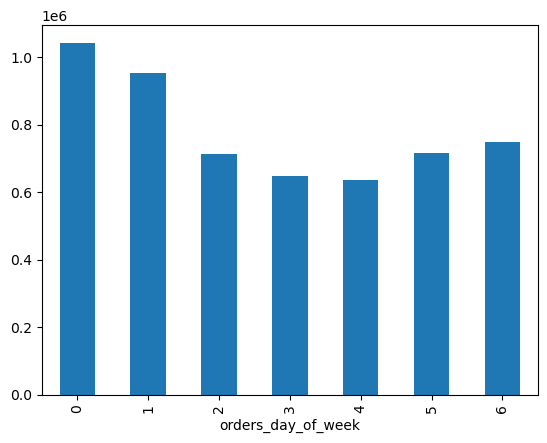

In [35]:
bar_Northeast_purchase_day = df_Northeast['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [36]:
bar_Northeast_purchase_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Northeast_purchase_day.png'))

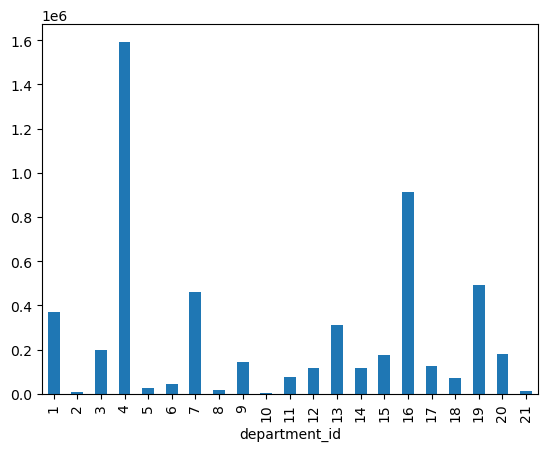

In [37]:
bar_Northeast_purchase_item = df_Northeast['department_id'].value_counts().sort_index().plot.bar()

In [38]:
bar_Northeast_purchase_item.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Northeast_purchase_item.png'))

In [39]:
df_South = df2[df2['region']== 'South']

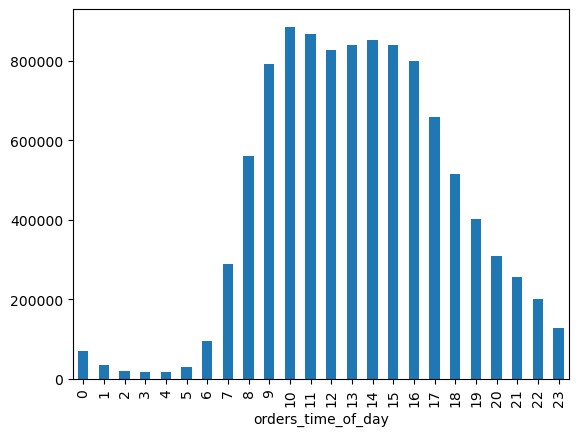

In [40]:
bar_South_purchase_time = df_South['orders_time_of_day'].value_counts().sort_index().plot.bar()

In [41]:
bar_South_purchase_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_South_purchase_time.png'))

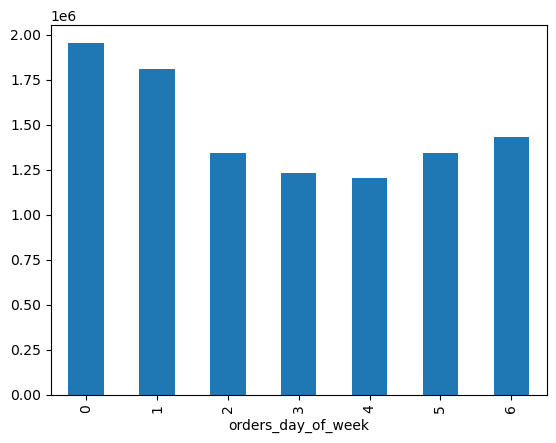

In [42]:
bar_South_purchase_day = df_South['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [43]:
bar_South_purchase_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_South_purchase_day.png'))

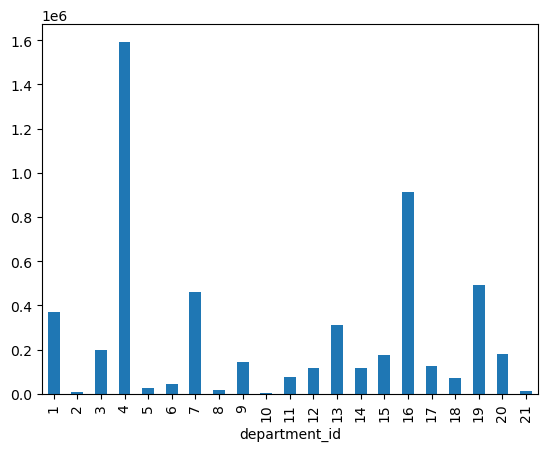

In [44]:
bar_South_purchase_item = df_Northeast['department_id'].value_counts().sort_index().plot.bar()

In [45]:
bar_South_purchase_item.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_South_purchase_item.png'))

# 07 Aggregate Customer Profiles

In [87]:
# aggregate demographic_profile and income
df2.groupby('demographic_profile').agg({'income': ['mean','min','max']})

income               
                                          mean    min     max
demographic_profile                                          
Baby Boomers with Dependants     115720.889116  29001  593901
Baby Boomers without Dependants  116062.436995  29011  578251
Gen X with Dependants            102266.996861  25941  592409
Gen X without Dependants         102500.613028  25903  584097
Gen Z with Dependants             70588.045814  25972  396364
Gen Z without Dependants          69180.286951  26067  353393
Millennials with Dependants       70664.886451  25911  392552
Millennials without Dependants    70742.121888  25979  387860

In [88]:
# aggregate demographic_profile and order_number
df2.groupby('demographic_profile').agg({'order_number': ['mean','min','max']})

order_number        
                                        mean min max
demographic_profile                                 
Baby Boomers with Dependants       17.693317   1  99
Baby Boomers without Dependants    18.177951   1  99
Gen X with Dependants              17.946126   1  99
Gen X without Dependants           17.794068   1  99
Gen Z with Dependants              17.976857   1  99
Gen Z without Dependants           17.477152   1  99
Millennials with Dependants        17.800280   1  99
Millennials without Dependants     17.764511   1  99

In [89]:
# aggregate demographic_profile and days_since_prior_order
df2.groupby('demographic_profile').agg({'days_since_prior_order': ['mean','min','max']})

days_since_prior_order           
                                                  mean  min   max
demographic_profile                                              
Baby Boomers with Dependants                 10.847277  0.0  30.0
Baby Boomers without Dependants              10.711292  0.0  30.0
Gen X with Dependants                        10.771039  0.0  30.0
Gen X without Dependants                     10.824346  0.0  30.0
Gen Z with Dependants                        10.752099  0.0  30.0
Gen Z without Dependants                     11.141716  0.0  30.0
Millennials with Dependants                  10.812992  0.0  30.0
Millennials without Dependants               10.870309  0.0  30.0

In [90]:
# aggregate demographic_profile and add_to_cart_order
df2.groupby('demographic_profile').agg({'add_to_cart_order': ['mean','min','max']})

add_to_cart_order         
                                             mean min  max
demographic_profile                                       
Baby Boomers with Dependants             8.339266   1  145
Baby Boomers without Dependants          8.350911   1  137
Gen X with Dependants                    8.359135   1  104
Gen X without Dependants                 8.275473   1  109
Gen Z with Dependants                    8.410277   1  102
Gen Z without Dependants                 8.138412   1   63
Millennials with Dependants              8.440371   1  109
Millennials without Dependants           8.392792   1   86

In [13]:
# create a total spend column 
df2['total_spend'] = df2.groupby('user_id')['prices'].transform('sum')

In [93]:
# aggregate demographic_profile and total_spend
df2.groupby('demographic_profile').agg({'total_spend': ['mean','min','max']})

total_spend               
                                        mean   min      max
demographic_profile                                        
Baby Boomers with Dependants     3376.312636   6.8  26394.9
Baby Boomers without Dependants  3487.315358  15.7  24307.1
Gen X with Dependants            3448.467298  10.4  22696.9
Gen X without Dependants         3361.128996   5.0  20315.1
Gen Z with Dependants            3506.642459  21.8  16007.3
Gen Z without Dependants         3235.899105  24.8  12791.1
Millennials with Dependants      3441.836175   7.0  18910.0
Millennials without Dependants   3405.696627  10.5  18883.2

In [94]:
# aggregate Region and total_spend
df2.groupby('region').agg({'total_spend': ['mean','min','max']})

total_spend              
                  mean  min      max
region                              
Midwest    3358.504028  7.0  26394.9
Mountain   3450.734085  5.0  18910.0
Northeast  3438.609495  7.7  22777.9
South      3424.804206  6.8  24307.1

In [14]:
# aggregate dependants and total_spend
df2.groupby('dependants').agg({'total_spend': ['mean','min','max']})

total_spend              
                       mean  min      max
dependants                               
Has Dependants  3415.083731  6.8  26394.9
No Dependants   3428.074479  5.0  24307.1

In [16]:
# aggregate marital_status and total_spend
df2.groupby('marital_status').agg({'total_spend': ['mean','min','max']})

total_spend               
                                         mean   min      max
marital_status                                              
divorced/widowed                  3461.330920  15.7  24307.1
living with parents and siblings  3459.618715  14.4  16048.1
married                           3412.050028   6.8  26394.9
single                            3410.806081   5.0  20315.1

In [17]:
# aggregate income and total_spend
df2.groupby('income_type').agg({'total_spend': ['mean','min','max']})

total_spend               
                    mean   min      max
income_type                            
High         3520.919609  24.7  26394.9
Low          2817.050466   5.0  24307.1
Middle       3580.098320  15.7  22696.9

In [96]:
# aggregate loyalty_flag and total_spend
df2.groupby('loyalty_flag').agg({'total_spend': ['mean','min','max']})

total_spend                
                         mean    min      max
loyalty_flag                                 
Loyal customer    6153.840807  156.0  26394.9
New customer       785.446264    5.0   3920.4
Regular customer  2443.027952   15.7  12186.6

In [103]:
# aggregate loyalty_flag and average_spend
df2.groupby('loyalty_flag').agg({'average_spend': ['mean','min','max']})

average_spend                        
                          mean       min           max
loyalty_flag                                          
Loyal customer       10.386336  2.387671   8794.882427
New customer         13.387725  1.000000  15006.940000
Regular customer     12.495717  1.308333   4506.269204

In [18]:
# aggregate region and average_spend
df2.groupby('region').agg({'average_spend': ['mean','min','max']})

average_spend                      
                   mean     min           max
region                                       
Midwest       12.681835  1.0000   8794.882427
Mountain      11.276491  1.0000  10209.987755
Northeast     11.542582  1.1000   7414.485185
South         12.118845  1.2625  15006.940000

In [104]:
# aggregate generation and average_spend
df2.groupby('generation').agg({'average_spend': ['mean','min','max']})

average_spend                        
                      mean       min           max
generation                                        
Baby Boomers     11.890671  1.262500  14042.512281
Gen X            11.843654  1.000000  15006.940000
Gen Z            10.220901  2.133333   1717.904274
Millennials      12.318198  1.000000  10209.987755

In [22]:
loyalty_reorder = pd.crosstab(df2['loyalty_flag'], df2['reordered'])

In [24]:
loyalty_reorder

reordered,0,1
loyalty_flag,,
Loyal customer,2680619,7603474
New customer,2967388,1836307
Regular customer,6548875,9327901


<Axes: xlabel='loyalty_flag'>

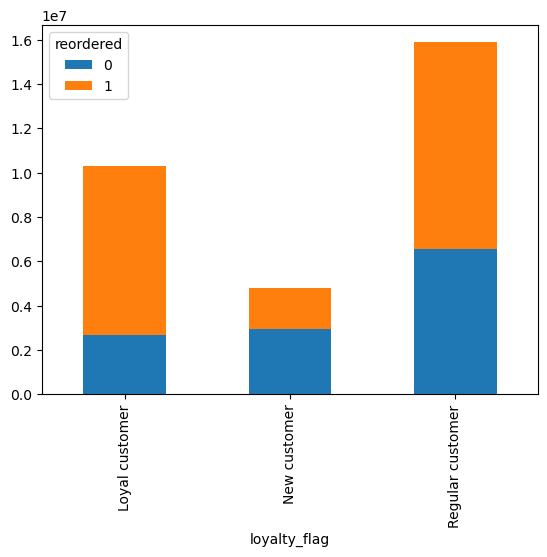

In [23]:
loyalty_reorder.plot(kind='bar', stacked=True)

In [25]:
# aggregate loyalty and days_since_prior_order
df2.groupby('loyalty_flag').agg({'days_since_prior_order': ['mean','min','max']})

days_since_prior_order           
                                   mean  min   max
loyalty_flag                                      
Loyal customer                 6.026656  0.0  30.0
New customer                  17.598691  0.0  30.0
Regular customer              12.155135  0.0  30.0

In [27]:
# aggregate Region and days_since_prior_order
df2.groupby('region').agg({'days_since_prior_order': ['mean','min','max']})

days_since_prior_order           
                            mean  min   max
region                                     
Midwest                10.892736  0.0  30.0
Mountain               10.754622  0.0  30.0
Northeast              10.774220  0.0  30.0
South                  10.814227  0.0  30.0

In [22]:
# aggregate marital_status and days_since_prior_order
df2.groupby('marital_status').agg({'days_since_prior_order': ['mean','min','max']})

days_since_prior_order           
                                                   mean  min   max
marital_status                                                    
divorced/widowed                              10.750328  0.0  30.0
living with parents and siblings              10.750995  0.0  30.0
married                                       10.820875  0.0  30.0
single                                        10.813571  0.0  30.0

In [23]:
# aggregate income_type and days_since_prior_order
df2.groupby('income_type').agg({'days_since_prior_order': ['mean','min','max']})

days_since_prior_order           
                              mean  min   max
income_type                                  
High                     10.783754  0.0  30.0
Low                      11.076447  0.0  30.0
Middle                   10.704968  0.0  30.0

In [33]:
# aggregate spending_flag and 'average_spend
df2.groupby('spending_flag').agg({'average_spend': ['mean','min','max']})

average_spend                    
                       mean   min           max
spending_flag                                  
High spender     220.821561  10.0  15006.940000
Low spender        7.781890   1.0      9.998305

In [31]:
# aggregate frequent_flag and average_spend
df2.groupby('frequent_flag').agg({'average_spend': ['mean','min','max']})

average_spend                   
                               mean  min           max
frequent_flag                                         
Frequent customer         11.697724  1.4  14042.512281
Non-frequent customer     12.004882  1.0   6388.812766
Regular customer          12.631742  1.0  15006.940000

In [26]:
# aggregate frequent_flag and total_spend
df2.groupby('frequent_flag').agg({'total_spend': ['mean','min','max']})

total_spend               
                              mean   min      max
frequent_flag                                    
Frequent customer      4278.224638  11.0  26394.9
Non-frequent customer   977.764573   6.8   5672.0
Regular customer       1791.522930   5.0  10682.7

In [27]:
# aggregate spending_flag and total_spend
df2.groupby('spending_flag').agg({'total_spend': ['mean','min','max']})

total_spend               
                      mean   min      max
spending_flag                            
High spender   3623.316718  24.7  17017.2
Low spender    3414.256729   5.0  26394.9

In [29]:
# aggregate spending_flag and days_since_prior_orde
df2.groupby('spending_flag').agg({'days_since_prior_order': ['mean','min','max']})

days_since_prior_order           
                                mean  min   max
spending_flag                                  
High spender               10.486910  0.0  30.0
Low spender                10.816751  0.0  30.0

In [30]:
# aggregate frequent_flag and days_since_prior_orde
df2.groupby('frequent_flag').agg({'days_since_prior_order': ['mean','min','max']})

days_since_prior_order           
                                        mean  min   max
frequent_flag                                          
Frequent customer                   7.858289  0.0  30.0
Non-frequent customer              22.790646  0.0  30.0
Regular customer                   15.532112  0.0  30.0

In [34]:
# aggregate dependants and days_since_prior_orde
df2.groupby('dependants').agg({'days_since_prior_order': ['mean','min','max']})

days_since_prior_order           
                                 mean  min   max
dependants                                      
Has Dependants              10.816416  0.0  30.0
No Dependants               10.791951  0.0  30.0

In [105]:
# aggregate dependants and average_spend
df2.groupby('dependants').agg({'average_spend': ['mean','min','max']})

average_spend                   
                        mean  min           max
dependants                                     
Has Dependants     11.877157  1.0  10209.987755
No Dependants      12.102657  1.0  15006.940000

In [20]:
# aggregate marital_status and average_spend
df2.groupby('marital_status').agg({'average_spend': ['mean','min','max']})

average_spend                        
                                          mean       min           max
marital_status                                                        
divorced/widowed                     11.532741  1.308333  14042.512281
living with parents and siblings     10.890167  2.133333  10209.987755
married                              11.944390  1.000000   7414.485185
single                               12.398586  1.000000  15006.940000

In [35]:
# aggregate income_type and average_spend
df2.groupby('income_type').agg({'average_spend': ['mean','min','max']})

average_spend                        
                     mean       min           max
income_type                                      
High            15.472208  7.000000  15006.940000
Low              7.026660  1.000000     14.423077
Middle           8.344063  1.308333   3453.431034

In [14]:
# aggregate dependants	 and region
df2.groupby('dependants').agg({'income': ['mean','min','max']})

income               
                        mean    min     max
dependants                                 
Has Dependants  99602.238016  25911  593901
No Dependants   99896.801937  25903  584097

In [13]:
# aggregate region and income
df2.groupby('region').agg({'income': ['mean','min','max']})

income               
                    mean    min     max
region                                 
Midwest    100380.647818  25903  579397
Mountain    99546.021028  25937  593901
Northeast   99745.286352  26095  584097
South       99242.561807  25911  591089

In [16]:
# aggregate  loyalty_flag and income
df2.groupby('loyalty_flag').agg({'income': ['mean','min','max']})

income               
                           mean    min     max
loyalty_flag                                  
Loyal customer    100354.615594  25955  593901
New customer       97419.249228  25903  590790
Regular customer   99918.972480  25972  592409

In [17]:
# aggregate  marital_status and income
df2.groupby('marital_status').agg({'income': ['mean','min','max']})

income               
                                           mean    min     max
marital_status                                                
divorced/widowed                  115969.768975  29011  578251
living with parents and siblings   70870.404339  25937  396364
married                           101559.437850  25911  593901
single                             91550.918195  25903  584097

In [18]:
# aggregate income_type and income
df2.groupby('income_type').agg({'income': ['mean','min','max']})

income               
                      mean    min     max
income_type                              
High         130182.912763  94000  593901
Low           45132.536055  25903   57999
Middle        75820.165170  58000   93999

In [19]:
# aggregate spending_flag and income
df2.groupby('spending_flag').agg({'income': ['mean','min','max']})

income               
                        mean    min     max
spending_flag                              
High spender   208754.316830  41746  593901
Low spender     97507.940356  25903  169997

In [20]:
# aggregate  frequent_flag and income
df2.groupby('frequent_flag').agg({'income': ['mean','min','max']})

income               
                                mean    min     max
frequent_flag                                      
Frequent customer      100055.072242  25955  593901
Non-frequent customer   97542.010727  25911  544217
Regular customer        99404.429883  25903  590790

# 08. Compare customer profiles with regions and departments

In [100]:
# create pivot table to list out each region's most frequently department_id purchase
df2.pivot_table(index = "department_id", columns = "region", aggfunc = {"region": len})

region                            
region         Midwest Mountain Northeast    South
department_id                                     
1               498225   543164    370436   709906
2                 7983     8581      6268    11579
3               261753   288155    199300   371620
4              2134115  2324678   1593004  3027476
5                34043    36754     25017    48813
6                60666    65998     44678    84649
7               598979   650574    462929   859419
8                21358    24059     17734    29909
9               193463   212043    143817   272813
10                7929     8743      5599    11180
11              100398   106647     74765   142496
12              158260   173830    118571   224120
13              420334   457886    312731   591754
14              156155   173619    117904   223172
15              237459   260221    176936   337458
16             1212490  1327060    914616  1723016
17              166992   178200    124604   230061
18               95741   102428     72712   139511
19              645143   711329    493154   916780
20              234464   257352    178398   333620
21               15563    15906     11512    21787

In [102]:
# create pivot table to list out each generation's Region distribution
df2.pivot_table(index = "region", columns = "generation", aggfunc = {"generation": len})

generation                             
generation Baby Boomers    Gen X   Gen Z Millennials
region                                              
Midwest         3374168  1868934  216918     1801493
Mountain        3727928  1980790  252839     1965670
Northeast       2576255  1336956  175766     1375708
South           4776930  2583798  329011     2621400

# 09. Produce suitable charts to illustrate your results

Text(0.5, 1.0, 'Busiest Days of the Week')

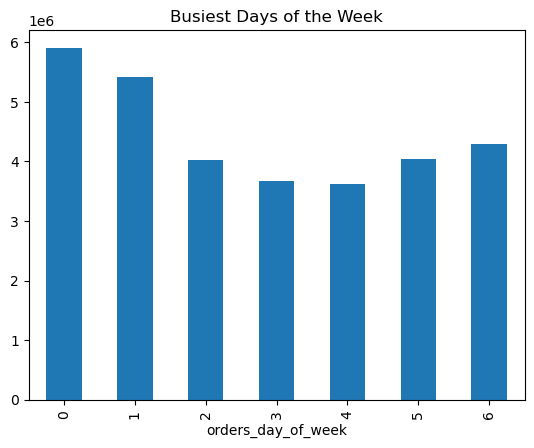

In [115]:
bar_busiest_days_of_the_week = df2['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Busiest Days of the Week')

In [116]:
bar_busiest_days_of_the_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_busiest_days_of_the_week.png'))

Text(0.5, 1.0, 'Busiest Hours of the Day')

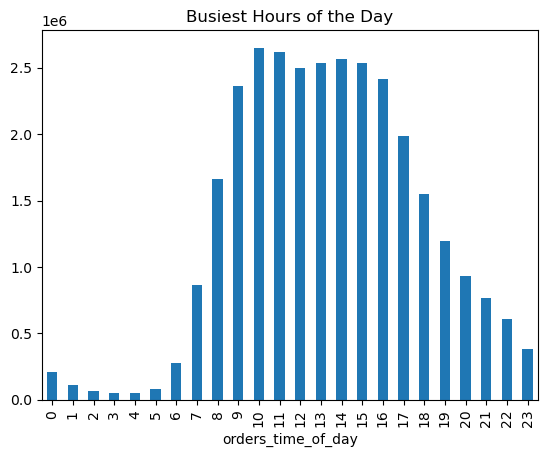

In [117]:
bar_busiest_hours_of_theday = df2['orders_time_of_day'].value_counts().sort_index().plot.bar()
plt.title('Busiest Hours of the Day')

In [118]:
bar_busiest_hours_of_theday.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_busiest_hours_of_the_day.png'))

In [119]:
# Create a Dataset for Rush hours 9am-4pm
df_rush_hours = df2[df2['orders_time_of_day'].isin([9,10,11,12,13,14,15,16])]

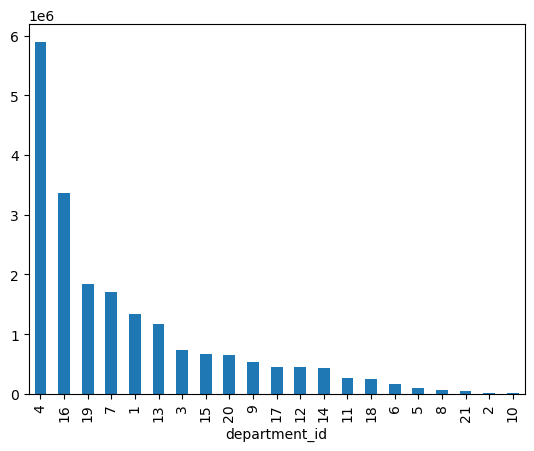

In [120]:
bar_rush_hours_purchase_item = df_rush_hours['department_id'].value_counts().plot.bar()

In [121]:
# Create a Dataset for produce order
df_produce_item = df2[df2['department_id'].isin([4])]

Text(0.5, 1.0, 'The most popular time for selling produce items')

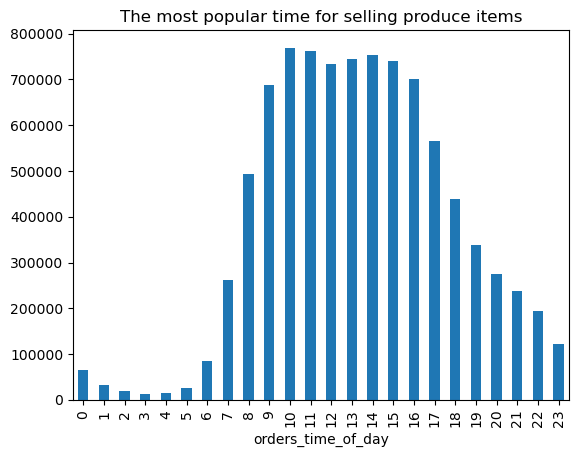

In [123]:
bar_produce_item_popular_time = df_produce_item['orders_time_of_day'].value_counts().sort_index().plot.bar()
plt.title('The most popular time for selling produce items')

In [126]:
# create pivot table to list out 'The most popular time for selling
df3 = pd.crosstab(df2["department_id"],
            df2["orders_time_of_day"],
            normalize = 'index')

In [128]:
df3.head()

orders_time_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
department_id,,,,,,,,,,,,,,,,,,,,,
1,0.006970,0.003972,0.002396,0.001836,0.001867,0.002920,0.008779,0.025807,0.047550,0.066170,...,0.083285,0.084445,0.082625,0.071711,0.058375,0.045066,0.033153,0.024664,0.019225,0.012421
2,0.006742,0.003749,0.003284,0.001947,0.001802,0.002877,0.008863,0.025486,0.050449,0.073203,...,0.083433,0.082706,0.078289,0.070036,0.054401,0.041469,0.030194,0.023655,0.018134,0.012002
3,0.006208,0.003190,0.002036,0.001547,0.001627,0.002647,0.009292,0.029468,0.054777,0.076300,...,0.083407,0.083330,0.079733,0.065361,0.050456,0.038200,0.029012,0.023230,0.018105,0.011440
4,0.007167,0.003673,0.002091,0.001512,0.001615,0.002855,0.009323,0.028734,0.054435,0.075882,...,0.082907,0.081645,0.077270,0.062299,0.048368,0.037280,0.030348,0.026265,0.021386,0.013362
5,0.003215,0.002026,0.001701,0.001224,0.001210,0.001798,0.004460,0.013974,0.034890,0.067975,...,0.097769,0.098619,0.093032,0.078326,0.057050,0.037801,0.021773,0.012577,0.009113,0.005684


Text(50.722222222222214, 0.5, 'Department ID')

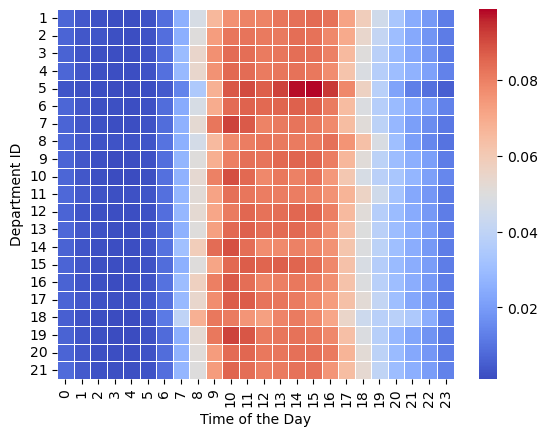

In [131]:
sns.heatmap(df3, cmap = 'coolwarm', linewidth=.5)
plt.xlabel('Time of the Day')
plt.ylabel('Department ID')

In [150]:
# Create a Dataset for Popular hours 9am-5pm
df_popular_hours = df2[df2['orders_time_of_day'].isin([9,10,11,12,13,14,15,16,17])]

In [151]:
# create pivot table to list out 'The most popular time for selling during popular hours
df4 = pd.crosstab(df_popular_hours["department_id"],
            df_popular_hours["orders_time_of_day"],
            normalize = 'index')

In [164]:
df4.head(21)

orders_time_of_day,9,10,11,12,13,14,15,16,17
department_id,,,,,,,,,
1,0.093858,0.108165,0.112446,0.112433,0.116267,0.118135,0.119780,0.117198,0.101718
2,0.102390,0.114828,0.115153,0.113893,0.113893,0.116698,0.115682,0.109503,0.097960
3,0.106154,0.116820,0.116297,0.112533,0.114352,0.116043,0.115936,0.110931,0.090935
4,0.106639,0.119053,0.117956,0.113626,0.115341,0.116510,0.114737,0.108589,0.087549
5,0.085881,0.110891,0.113739,0.109380,0.115494,0.123523,0.124597,0.117539,0.098958
6,0.095458,0.115741,0.118233,0.116321,0.117433,0.118270,0.117846,0.111387,0.089311
7,0.112788,0.125929,0.119860,0.109277,0.111833,0.113039,0.111573,0.106881,0.088818
8,0.092502,0.109325,0.113868,0.116057,0.114780,0.114492,0.114264,0.117774,0.106939
9,0.095890,0.111548,0.116149,0.115026,0.118346,0.119308,0.118684,0.112459,0.092589


Text(50.722222222222214, 0.5, 'Department ID')

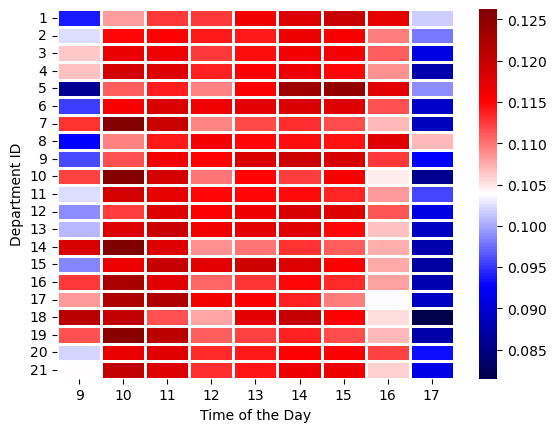

In [163]:
sns.heatmap(df4, cmap = 'seismic', linewidth=.8)
plt.xlabel('Time of the Day')
plt.ylabel('Department ID')

In [158]:
df5 = pd.crosstab(df2["department_id"],
            df2["orders_time_of_day"],
            normalize = 'all')

Text(50.722222222222214, 0.5, 'Department ID')

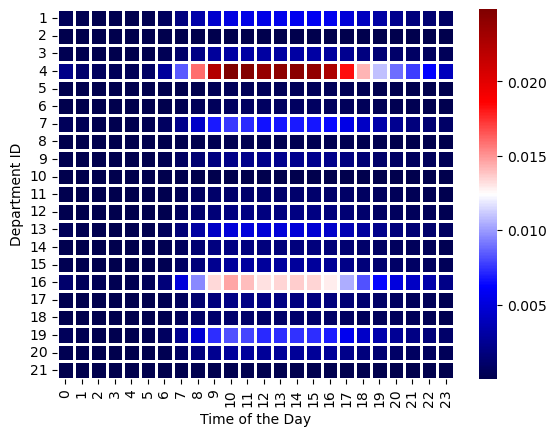

In [161]:
sns.heatmap(df5, cmap = 'seismic', linewidth=.8)
plt.xlabel('Time of the Day')
plt.ylabel('Department ID')

In [167]:
#create price range flag
df2.loc[df2['prices'] > 15, 'price_range_loc'] = 'High-range product'
df2.loc[(df2['prices'] <= 15) & (df2['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 
df2.loc[df2['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [171]:
pd.crosstab(df2["price_range_loc"],
            df2["income_type"])

income_type,High,Low,Middle
price_range_loc,,,
High-range product,230661,38643,123772
Low-range product,4927671,2026236,2720933
Mid-range product,11405252,3214697,6271822
nan,4729,0,148


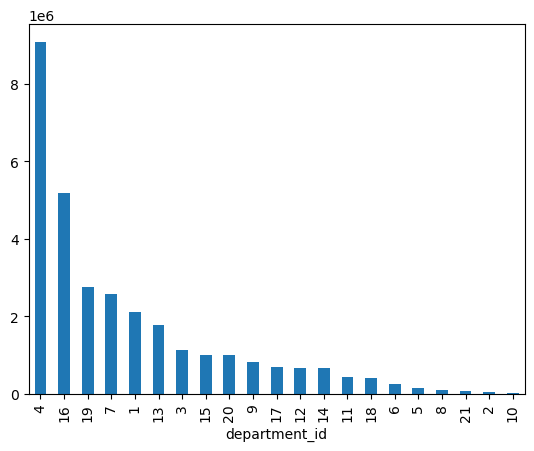

In [173]:
bar_popular_items = df2['department_id'].value_counts().plot.bar()